<a href="https://colab.research.google.com/github/Maxwell619/AI-Coursework-2025/blob/master/Employee_Attrition_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up and data loading

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

df = pd.read_csv('EmployeeAttrition.csv')


print("Initial Data Head:")
print(df.head())
print("\nData Info:")
df.info()

Initial Data Head:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOp

2. After appropriately cleaning the data, carry out Exploratory Data Analysis
processes to retrieve at least 4 insights/observations from the dataset.

#Data cleaning

In [ ]:
print("Total number of rows: ",len(df))
df.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates:", len(df))
display(df.head())
df.info()
print("\nMissing values per column:")
display(df.isnull().sum())

Total number of rows:  1470
Number of rows after dropping duplicates: 1470


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


#Exploratory data analysis

In [ ]:
display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Figure 1: Attrition by Department

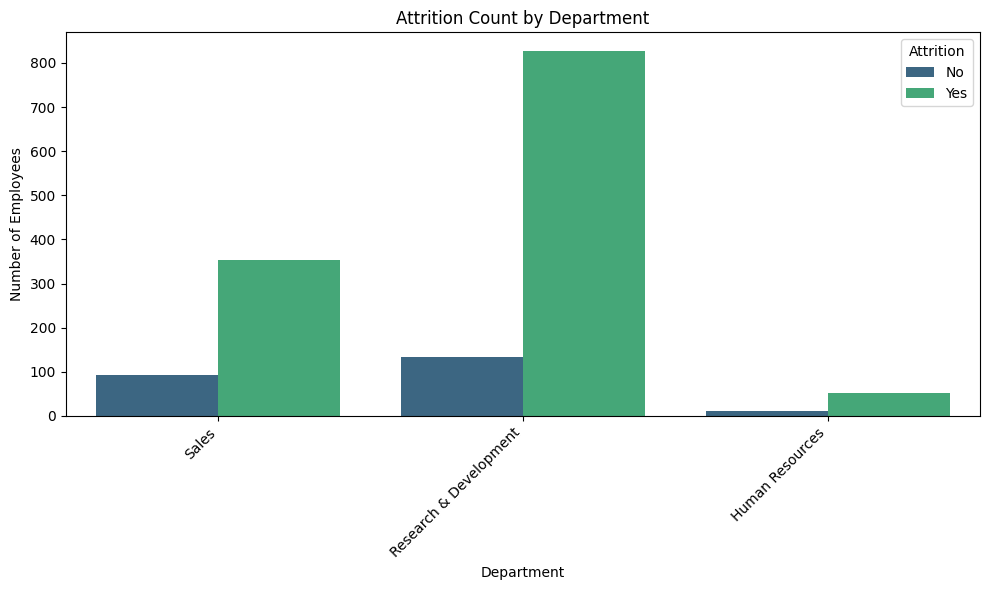

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition', palette='viridis')
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Figure 2: Monthly Income Distribution for Attrition vs. No Attrition

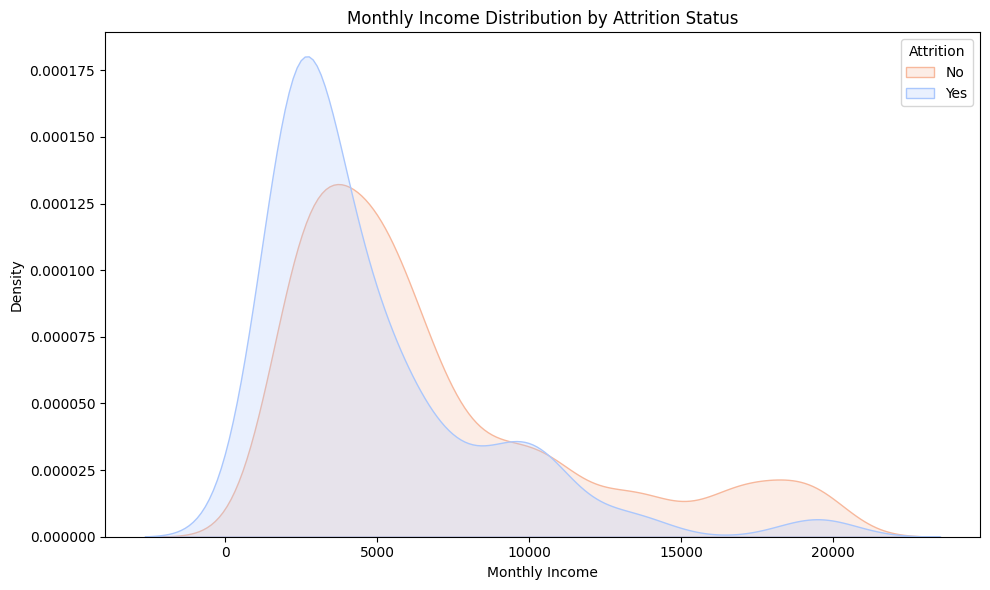

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyIncome', hue='Attrition', fill=True, common_norm=False, palette='coolwarm')
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

#Figure 3 Attrition by Gender

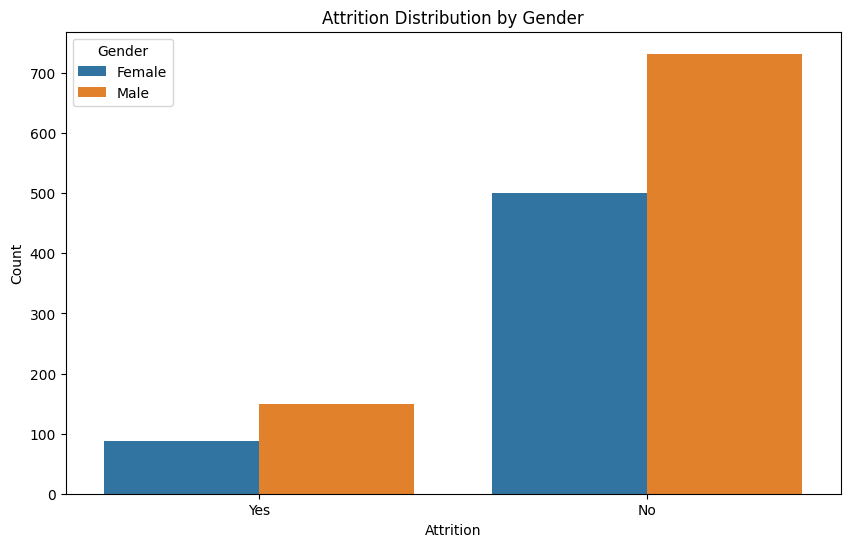

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', hue='Gender', data=df)
plt.title('Attrition Distribution by Gender')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

#Attrition by business travel

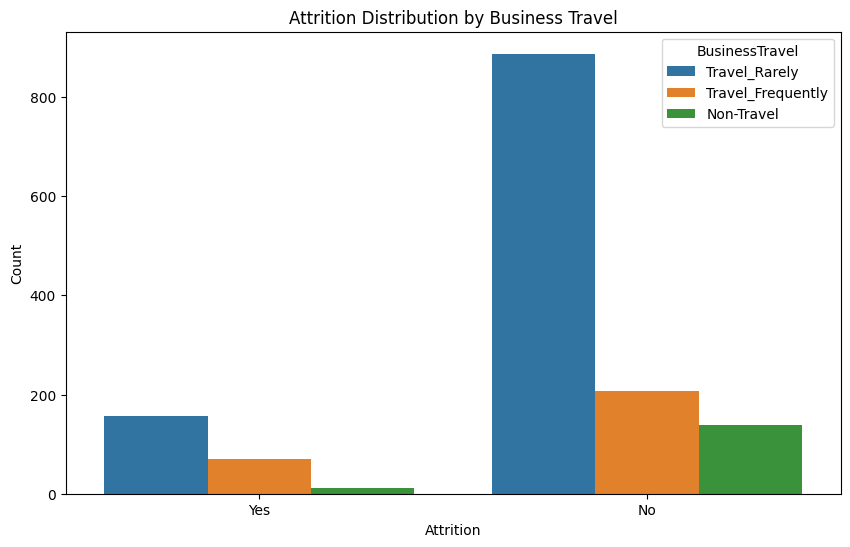

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', hue='BusinessTravel', data=df)
plt.title('Attrition Distribution by Business Travel')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

#Attrition by department

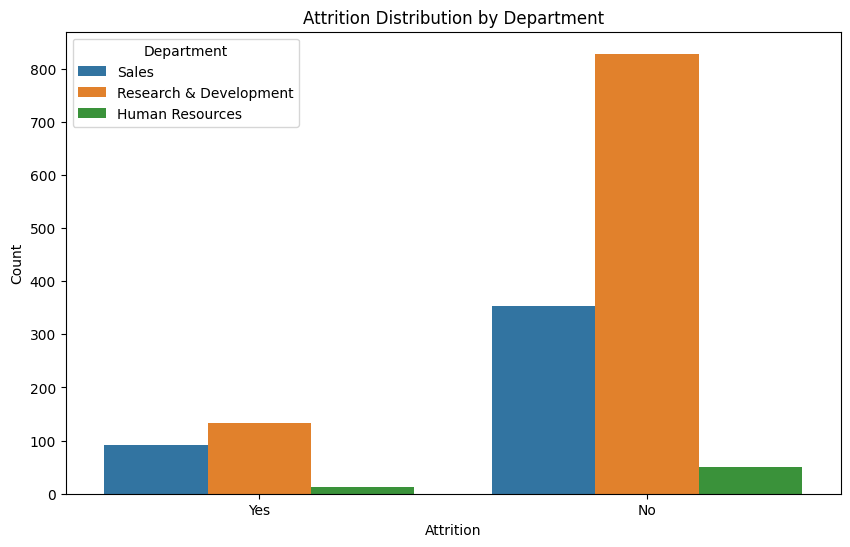

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', hue='Department', data=df)
plt.title('Attrition Distribution by Department')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

#Attrition by education field

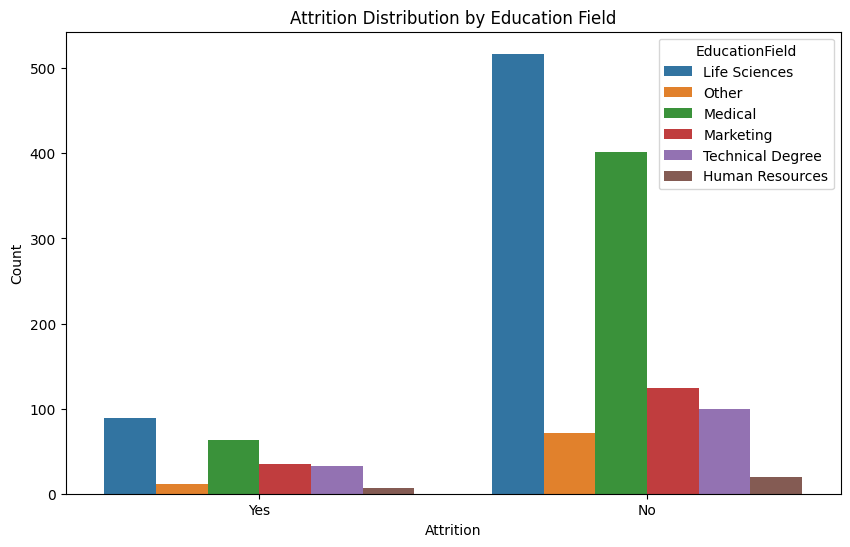

In [ ]:
plt.figure(1, figsize=(10, 6))
sns.countplot(x='Attrition', hue='EducationField', data=df)
plt.title('Attrition Distribution by Education Field')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

#Attrition by job role

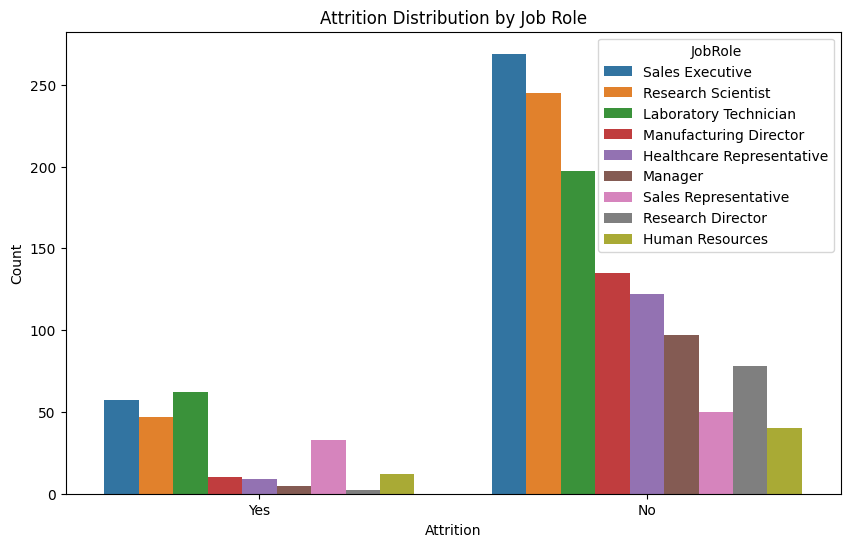

In [ ]:
plt.figure(1, figsize=(10, 6))
sns.countplot(x='Attrition', hue='JobRole', data=df)
plt.title('Attrition Distribution by Job Role')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

#Distribution of age for attrition

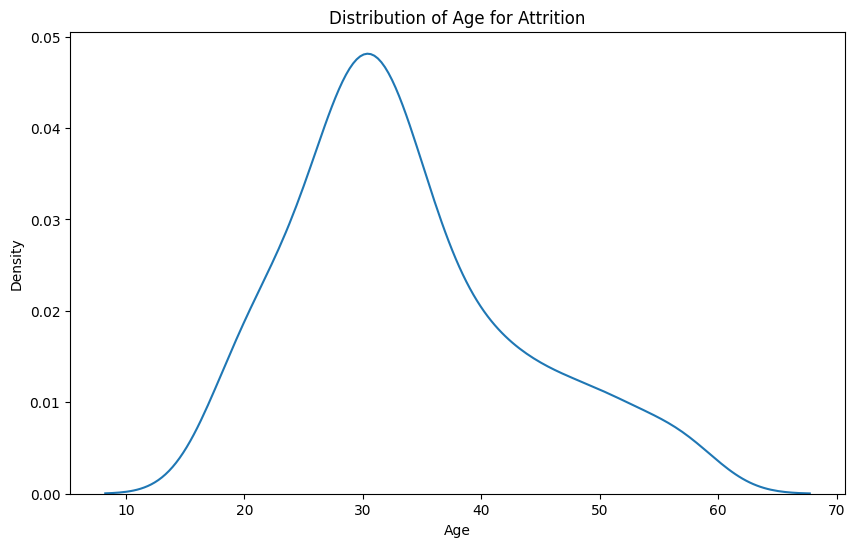

In [ ]:
plt.figure(1, figsize=(10, 6))
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label='Attrition Yes')
plt.title('Distribution of Age for Attrition')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


K-Means Clustering to identify best features

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18', 'Attrition']

print("Value counts for columns to be dropped:")
for col in columns_to_drop:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts())


df_clustering = df.drop(columns=columns_to_drop, errors='ignore')

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame for clustering shape after dropping columns: {df_clustering.shape}")
print("\nFirst 5 rows of the DataFrame for clustering:")
display(df_clustering.head())

Value counts for columns to be dropped:

--- EmployeeCount ---
EmployeeCount
1    1470
Name: count, dtype: int64

--- EmployeeNumber ---
EmployeeNumber
2068    1
1       1
2       1
4       1
5       1
       ..
23      1
22      1
21      1
20      1
19      1
Name: count, Length: 1470, dtype: int64

--- StandardHours ---
StandardHours
80    1470
Name: count, dtype: int64

--- Over18 ---
Over18
Y    1470
Name: count, dtype: int64

--- Attrition ---
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Original DataFrame shape: (1470, 36)
DataFrame for clustering shape after dropping columns: (1470, 31)

First 5 rows of the DataFrame for clustering:


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cluster
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


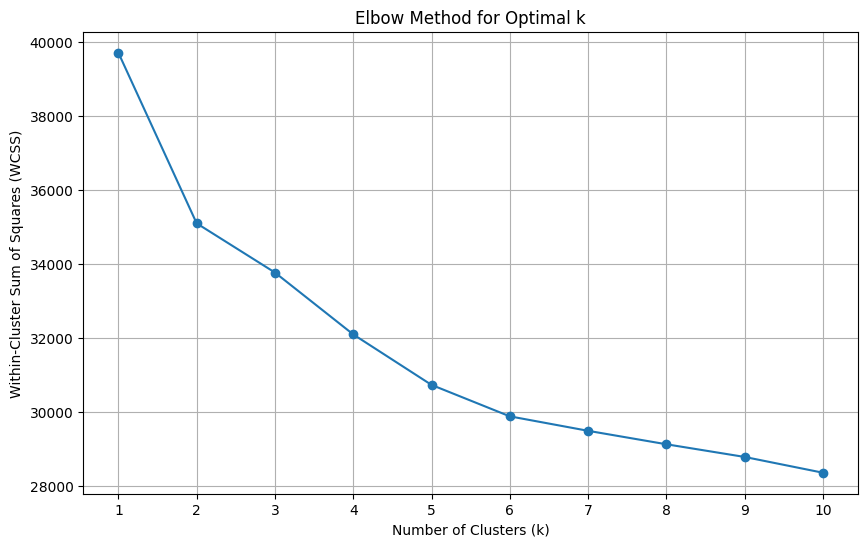

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []
k_range = range(1, 11)


for k in k_range:

    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')

    kmeans.fit(df_preprocessed)

    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [17]:
from sklearn.cluster import KMeans

k_optimal = 3

print(f"Optimal number of clusters (k) chosen: {k_optimal}")

kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init='auto')

kmeans.fit(df_preprocessed)

cluster_labels = kmeans.predict(df_preprocessed)


df['Cluster'] = cluster_labels

print("\nFirst 5 rows of original DataFrame with new 'Cluster' column:")
display(df.head())
print("\nValue counts for the new 'Cluster' column:")
print(df['Cluster'].value_counts())

Optimal number of clusters (k) chosen: 3

First 5 rows of original DataFrame with new 'Cluster' column:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cluster
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0



Value counts for the new 'Cluster' column:
Cluster
0    691
1    405
2    374
Name: count, dtype: int64


/tmp/ipython-input-1990560340.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_centroids.index, y=feature, data=cluster_centroids, palette='viridis')
/tmp/ipython-input-1990560340.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_centroids.index, y=feature, data=cluster_centroids, palette='viridis')
/tmp/ipython-input-1990560340.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_centroids.index, y=feature, data=cluster_centroids, palette='viridis')
/tmp/ipython-input-1990560340.py:18: FutureWarning: 

P

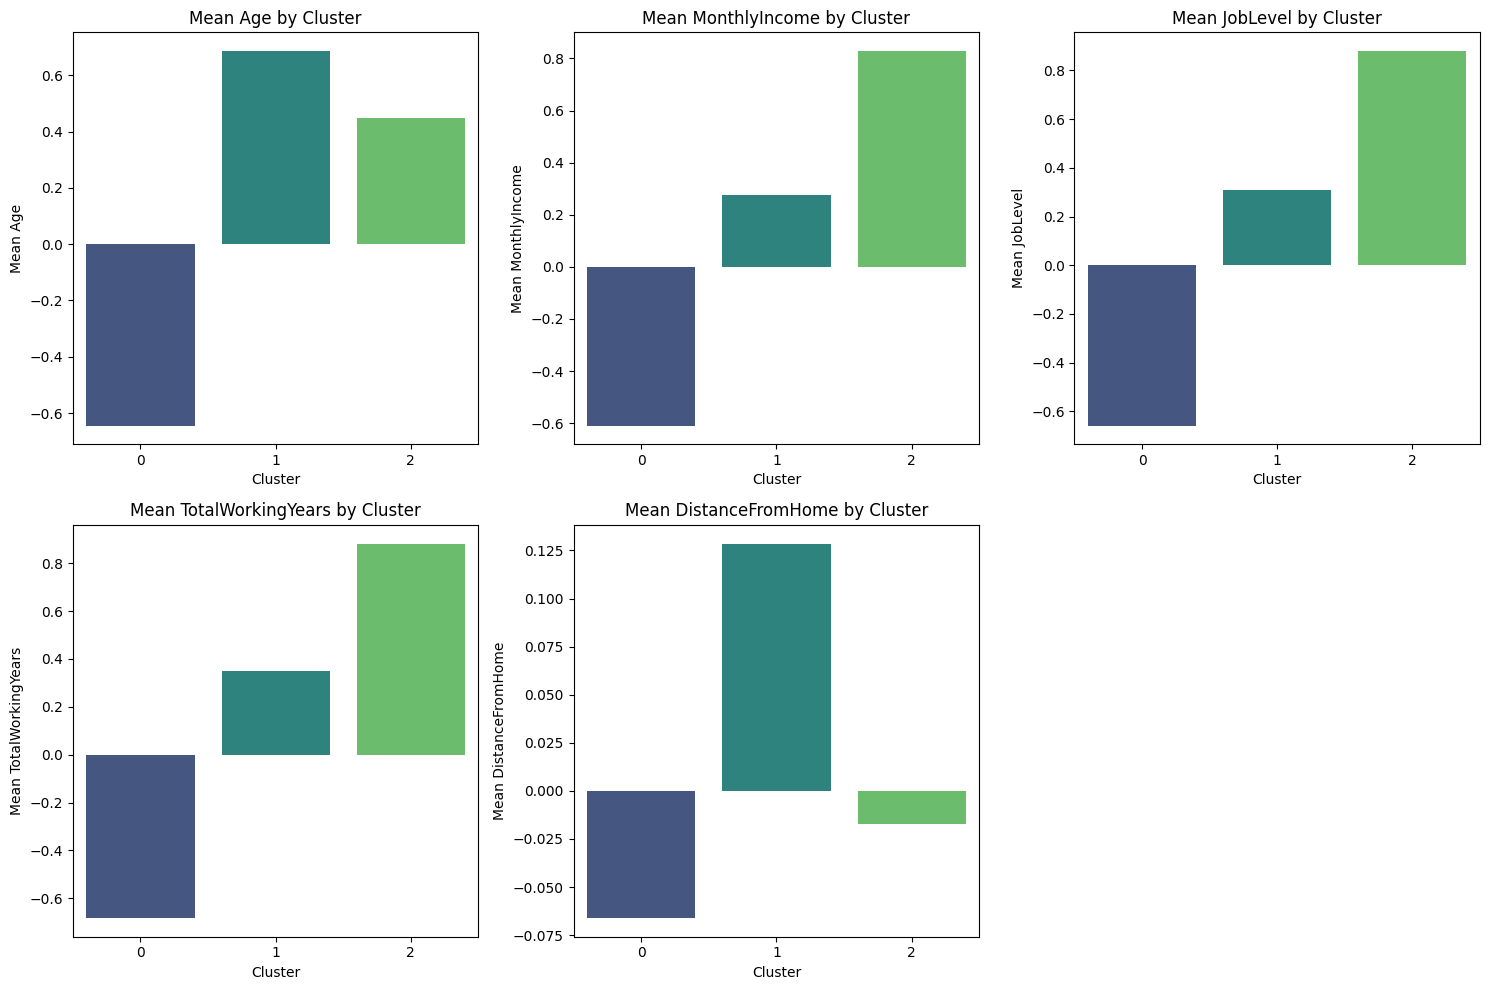

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


selected_numerical_features = [
    'Age',
    'MonthlyIncome',
    'JobLevel',
    'TotalWorkingYears',
    'DistanceFromHome'
]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=cluster_centroids.index, y=feature, data=cluster_centroids, palette='viridis')
    plt.title(f'Mean {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
plt.tight_layout()
plt.show()


k-Nearest Neighbours (kNN) Classifier Q3


The optimal number of neighbors (k) is: 19


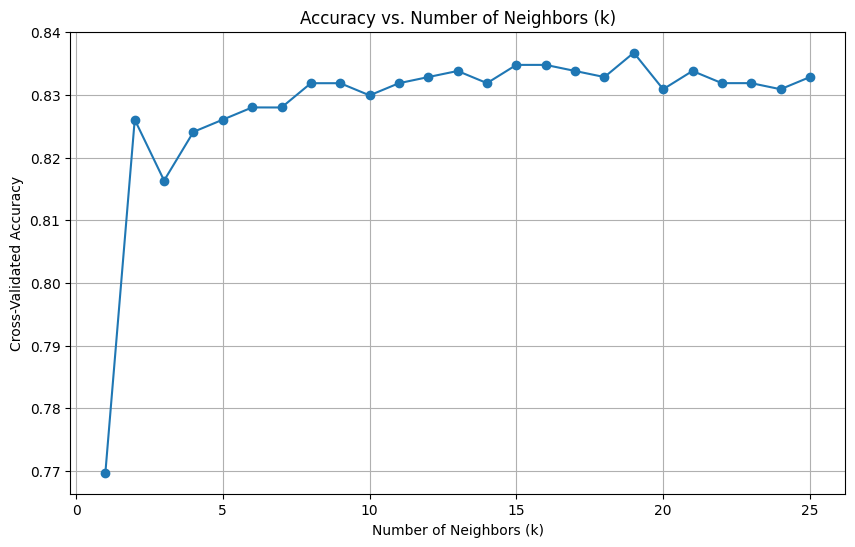

kNN Model A trained and predictions made on the test set.


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


k_range = range(1, 26)
cv_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


optimal_k_index = cv_scores.index(max(cv_scores))
optimal_k = k_range[optimal_k_index]

print(f"The optimal number of neighbors (k) is: {optimal_k}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()


knn_model_A = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model_A.fit(X_train, y_train)

y_pred_knn = knn_model_A.predict(X_test)

print("kNN Model A trained and predictions made on the test set.")

Eager Learning classifier Q4

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc_model_B = DecisionTreeClassifier(random_state=42)
dtc_model_B.fit(X_train, y_train)

y_pred_dtc_default = dtc_model_B.predict(X_test)

print("Default Decision Tree Model B trained and predictions made on the test set.")

Default Decision Tree Model B trained and predictions made on the test set.


*Model* C: Tuned Eager Learner Q5

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)


print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


dtc_tuned = grid_search.best_estimator_
y_pred_dtc_tuned = dtc_tuned.predict(X_test)

print("Tuned Decision Tree Model C trained and predictions made on the test set.")

Best Parameters found: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8348093772199858
Tuned Decision Tree Model C trained and predictions made on the test set.


Model Evaluation Q6

## Model Performance Evaluation (Confusion Matrix)
--------------------------------------------------

--- kNN (Model A) ---
Confusion Matrix:
 [[380   0]
 [ 61   0]]


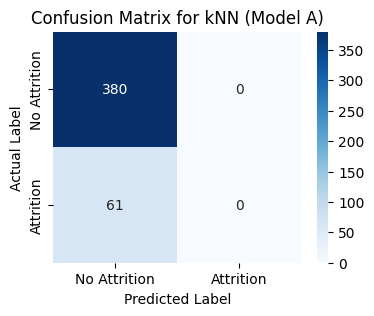

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8617
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441


--- Default DTC (Model B) ---
Confusion Matrix:
 [[326  54]
 [ 36  25]]


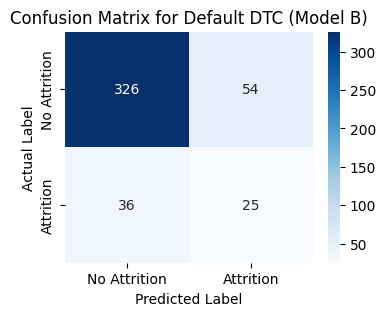

Accuracy: 0.7959
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       380
           1       0.32      0.41      0.36        61

    accuracy                           0.80       441
   macro avg       0.61      0.63      0.62       441
weighted avg       0.82      0.80      0.81       441


--- Tuned DTC (Model C) ---
Confusion Matrix:
 [[375   5]
 [ 55   6]]


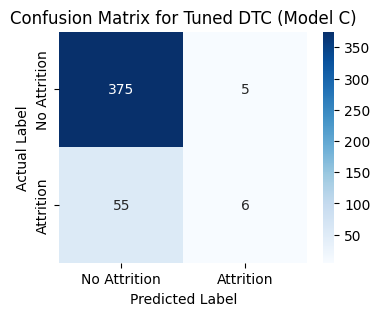

Accuracy: 0.8639
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.55      0.10      0.17        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.55       441
weighted avg       0.83      0.86      0.82       441



In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

models = {
    "kNN (Model A)": y_pred_knn,
    "Default DTC (Model B)": y_pred_dtc_default,
    "Tuned DTC (Model C)": y_pred_dtc_tuned
}

print("## Model Performance Evaluation (Confusion Matrix)")
print("-" * 50)

for name, y_pred in models.items():
    print(f"\n--- {name} ---")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
